In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [14]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze


maze = gym.make('Maze4-v0')
situation = maze.reset()
maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ A □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [ ]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(str(perception)) and
                cl.action == action and
                cl.wildcard_number() == 0]):
            nr_correct += 1
    return nr_correct / len(transitions)


def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity(),
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=4,
                    max_population=200,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




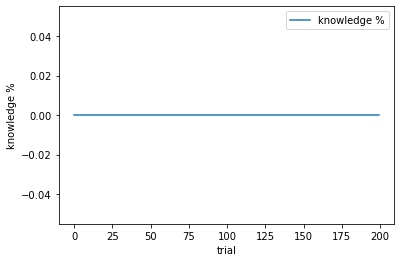

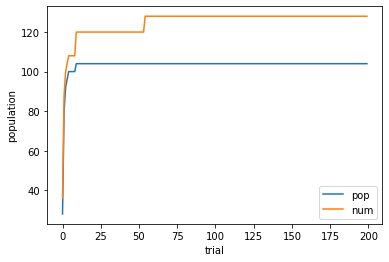

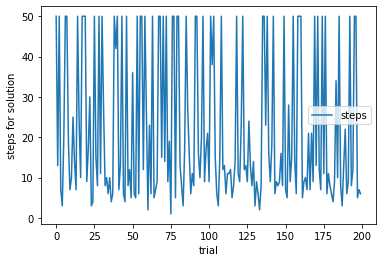

In [16]:
import pandas as pd

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [18]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
